#  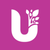   **Universidad de la ciudad de Buenos Aires**

---

# TRABAJO PRÁCTICO - Segundo Módulo: Programación Avanzada en Ciencia de Datos

## Enrique Ignacio Vazquez

### Desarrollo de un dashboard interactivo para el análisis  sobre Defunciones Generales Mensuales desde 2015 al 2021. 

### Procedimiento
####  1. Se realizará una exploración, validación y limpieza de la fuente de datos. Se quitarán columnas redundantes y se anexaran la siguientes tablas:
- Clasificación de enfermedades códigos CIE10.
- Agrupador de clasificación de enfermedas CIE10.

#### 2. Se migraran los datos a DuckDb fuente de datos del Dashboard

### Preparación de datos

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('data/arg_def_m_20_22.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760859 entries, 0 to 760858
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   region                       760859 non-null  object
 1   jurisdiccion                 760859 non-null  object
 2   mes_anio_defuncion           760859 non-null  object
 3   mes_def                      760859 non-null  int64 
 4   anio_def                     760859 non-null  int64 
 5   sexo_id                      760859 non-null  int64 
 6   sexo_nombre                  760859 non-null  object
 7   grupo_etario                 760859 non-null  object
 8   grupo_causa_defuncion_CIE10  760859 non-null  object
 9   cod_causa_muerte_CIE10       760859 non-null  object
 10  cantidad                     760859 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 63.9+ MB


#### Analisis de valores sobre sexo, mes y año para determinar inconsistencias

In [8]:
print(f"codigos_unicosSexos distintos : {df['sexo_nombre'].unique()}")
print(f"codigos_unicosAños distintos : {df['anio_def'].unique()}")
#Verificamos si hay meses con valores inválidos (menores a 1 o mayores a 12)
condicion_invalida = (df['mes_def'] < 1) | (df['mes_def'] > 12)
existen_valores_invalidos = condicion_invalida.any()
print(f"¿Existen meses con valores inválidos?: {existen_valores_invalidos}")

#Verificamos si hay años con valores inválidos mayores a 20225
condicion_invalida_anio = (df['anio_def'] >2025)
existen_valores_invalidos_anio = condicion_invalida_anio.any()
print(f"¿Existen años con valores inválidos?: {existen_valores_invalidos_anio}")

codigos_unicosSexos distintos : ['masculino' 'femenino' 'indeterminado' 'desconocido']
codigos_unicosAños distintos : [2021 2020 2022]
¿Existen meses con valores inválidos?: False
¿Existen años con valores inválidos?: False


#### Quitamos columnas redundantes o consideradas sin ultilidad

In [9]:
df.drop('grupo_causa_defuncion_CIE10', axis=1, inplace=True)
df.drop('mes_anio_defuncion', axis=1, inplace=True)
df.drop('sexo_id', axis=1, inplace=True)
df.head()

,region,jurisdiccion,mes_def,anio_def,sexo_nombre,grupo_etario,cod_causa_muerte_CIE10,cantidad
0,7.Cuyo2.,99.no identificado.,4,2021,masculino,07. de 80 anios y mas,I11,1
1,7.Cuyo2.,99.no identificado.,3,2021,masculino,07. de 80 anios y mas,I11,1
2,7.Cuyo2.,99.no identificado.,6,2021,masculino,03.de 40 a 49 anios,I12,1
3,7.Cuyo2.,99.no identificado.,3,2021,masculino,07. de 80 anios y mas,I12,1
4,7.Cuyo2.,99.no identificado.,7,2021,masculino,07. de 80 anios y mas,I12,1



#### Migración

In [10]:
dfcie10 = pd.read_csv('data/Cie10.csv')
dfcie10.info()
dfcie10.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           2024 non-null   object
 1   descripcion  2024 non-null   object
 2   grupo        2024 non-null   object
dtypes: object(3)
memory usage: 47.6+ KB


,id,descripcion,grupo
0,A00,Cólera,A00-B99
1,A01,Fiebres tifoidea y paratifoidea,A00-B99
2,A02,Otras infecciones debidas a Salmonella,A00-B99
3,A03,Shigelosis,A00-B99
4,A04,Otras infecciones intestinales bacterianas,A00-B99


In [11]:
dfcie10grupo = pd.read_csv('data/Cie10Grupos.csv')
dfcie10grupo.info()
dfcie10grupo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           21 non-null     object
 1   descripcion  21 non-null     object
 2   capitulo     21 non-null     object
dtypes: object(3)
memory usage: 636.0+ bytes


,id,descripcion,capitulo
0,A00-B99,CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIAS,CAPITULO I
1,C00-D48,TUMORES (NEOPLASIAS),CAPITULO II
2,D50-D89,ENFERMEDADES DE LA SANGRE Y DE LOS ÓRGANOS HEM...,CAPITULO III
3,E00-E90,"ENFERMEDADES ENDOCRINAS, NUTRICIONALES Y METAB...",CAPITULO IV
4,F00-F99,TRASTORNOS MENTALES Y DEL COMPORTAMIENTO,CAPITULO V


In [12]:
import duckdb
con = duckdb.connect('def20152021.duckdb')

# Crear tablas en DuckDB
# Tabla de defunciones
con.execute("CREATE OR REPLACE TABLE defunciones AS SELECT * FROM df")
# Tabla de CIE10
con.execute("CREATE OR REPLACE TABLE cie10 AS SELECT * FROM dfcie10")
# Tabla de CIE10 Grupos
con.execute("CREATE OR REPLACE TABLE cie10grupo AS SELECT * FROM dfcie10grupo") 


print("\n--- Tablas creadas en DuckDB ---")
# Verificamos que las tablas existen dentro de DuckDB
print(con.execute("SHOW TABLES").fetchdf())


--- Tablas creadas en DuckDB ---
          name
0        cie10
1   cie10grupo
2  defunciones


In [13]:
print("--- Tabla defunciones ---")
print(con.execute("DESCRIBE defunciones").fetchdf())
print(con.execute("select * from defunciones limit 5").fetchdf())

--- Tabla defunciones ---
              column_name column_type null   key default extra
0                  region     VARCHAR  YES  None    None  None
1            jurisdiccion     VARCHAR  YES  None    None  None
2                 mes_def      BIGINT  YES  None    None  None
3                anio_def      BIGINT  YES  None    None  None
4             sexo_nombre     VARCHAR  YES  None    None  None
5            grupo_etario     VARCHAR  YES  None    None  None
6  cod_causa_muerte_CIE10     VARCHAR  YES  None    None  None
7                cantidad      BIGINT  YES  None    None  None
     region         jurisdiccion  mes_def  anio_def sexo_nombre  \
0  7.Cuyo2.  99.no identificado.        4      2021   masculino   
1  7.Cuyo2.  99.no identificado.        3      2021   masculino   
2  7.Cuyo2.  99.no identificado.        6      2021   masculino   
3  7.Cuyo2.  99.no identificado.        3      2021   masculino   
4  7.Cuyo2.  99.no identificado.        7      2021   masculino   

    

In [14]:

print("--- Tabla cie10 ---")
print(con.execute("DESCRIBE cie10").fetchdf())
print(con.execute("select * from cie10 limit 5").fetchdf())


--- Tabla cie10 ---
   column_name column_type null   key default extra
0           id     VARCHAR  YES  None    None  None
1  descripcion     VARCHAR  YES  None    None  None
2        grupo     VARCHAR  YES  None    None  None
    id                                 descripcion    grupo
0  A00                                      Cólera  A00-B99
1  A01             Fiebres tifoidea y paratifoidea  A00-B99
2  A02      Otras infecciones debidas a Salmonella  A00-B99
3  A03                                  Shigelosis  A00-B99
4  A04  Otras infecciones intestinales bacterianas  A00-B99


In [15]:
print("--- Tabla cie10grupo ---")
print(con.execute("DESCRIBE cie10grupo").fetchdf())
print(con.execute("select id,descripcion from cie10grupo limit 5").fetchdf())


--- Tabla cie10grupo ---
   column_name column_type null   key default extra
0           id     VARCHAR  YES  None    None  None
1  descripcion     VARCHAR  YES  None    None  None
2     capitulo     VARCHAR  YES  None    None  None
        id                                        descripcion
0  A00-B99    CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIAS
1  C00-D48                               TUMORES (NEOPLASIAS)
2  D50-D89  ENFERMEDADES DE LA SANGRE Y DE LOS ÓRGANOS HEM...
3  E00-E90  ENFERMEDADES ENDOCRINAS, NUTRICIONALES Y METAB...
4  F00-F99           TRASTORNOS MENTALES Y DEL COMPORTAMIENTO


In [16]:
con.close()